In [96]:
import torch
from torch import nn
from d2l import torch as d2l

# hyperparameters
num_epochs = 50
learning_rate = 0.1
batch_size = 256

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [97]:
num_inputs, num_outputs = 28 * 28, 10
num_hiddens1, num_hiddens2 = 256, 256

net = nn.Sequential(nn.Flatten(),
                    nn.Linear(num_inputs, num_hiddens1), nn.ReLU(),
                    nn.Linear(num_hiddens1, num_hiddens2), nn.ReLU(),
                    nn.Linear(num_hiddens2, num_outputs))

def init_params(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0., 0.01)
        nn.init.zeros_(m.bias)
    
net.apply(init_params)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=10, bias=True)
)

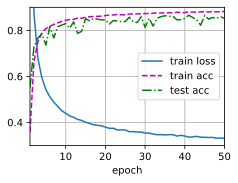

In [98]:
weight_params = [param for name, param in net.named_parameters() if 'weight' in name]
other_params  = [param for name, param in net.named_parameters() if 'weight' not in name]

loss    = nn.CrossEntropyLoss(reduction = 'none')
trainer = torch.optim.SGD([{'params': weight_params, 'weight_decay': 1e-3 * 3},
                           {'params': other_params}], learning_rate)
# trainer = torch.optim.SGD(net.parameters(), learning_rate)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

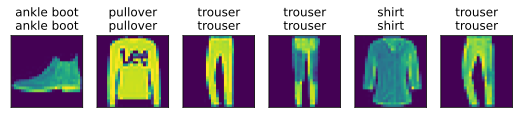

In [99]:
d2l.predict_ch3(net, test_iter)